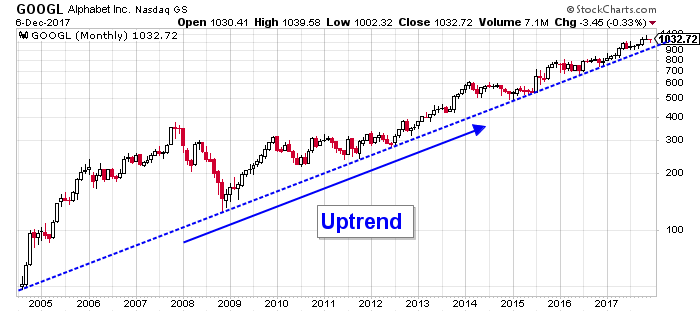

# GOOGLE STOCK PRICE PREDICTION

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import tensorflow as tf

### We read the data and also calculate the computation time.

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%time training_data = pd.read_csv('/content/drive/MyDrive/stock/Google_Stock_Price_Train.csv')

# Checking the shape of the data
training_data.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CPU times: user 10.9 ms, sys: 861 µs, total: 11.7 ms
Wall time: 227 ms


(1258, 6)

In [3]:
training_data.shape

(1258, 6)

In [4]:
training_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


### Date: The date of recorded data.

### Open: The price when stock market open.

### High: The highest price point of the date.

### Low: The lowest price point of the date.

### Volume:  The total sale of stock on that date.

In [5]:
# Describe the data
training_data.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [6]:
# We will work on the open stock price only and take out the 'Open' stock column.
training_data = training_data.iloc[:, 1:2]

# The training_data is in the form of dataframe.
training_data.shape

(1258, 1)

In [7]:
# We check the head of the data.
training_data.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


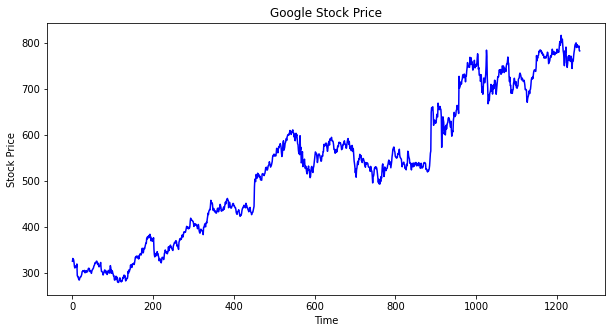

In [8]:
# We visualize the google stock price using matplotlib
plt.figure(figsize=(10,5))
plt.plot(training_data, color='blue')
plt.ylabel('Stock Price')
plt.title('Google Stock Price')
plt.xlabel('Time')
plt.show();

In [9]:
# Normalize the training data between [0,1]
from sklearn.preprocessing import MinMaxScaler

# The fit method, when applied to the training dataset, learns the model parameters (for example, mean and standard deviation). 
# We then need to apply the transform method on the training dataset to get the transformed (scaled) training dataset.
# We could also perform both of this step in one step by applying fit_transform on the training dataset.

mm = MinMaxScaler(feature_range = (0, 1))
training_data_scaled = mm.fit_transform(training_data)
training_data_scaled.shape

(1258, 1)

### As you can see that the Y-axis is completely changed.
### It is scaled in between 0 and 1 because, all the values are in different weights and in order to have a good prediction, scaling has to be made.
### Remember that the scaling can be done on to floating point values.

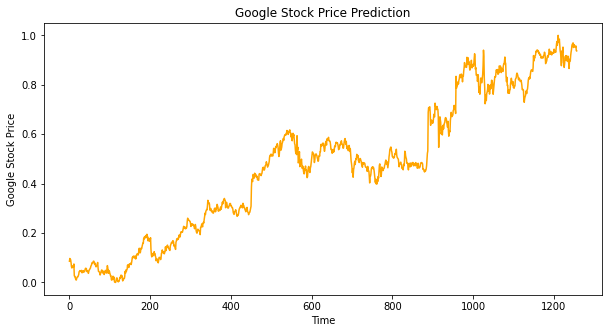

In [10]:
plt.figure(figsize=(10,5))
plt.plot(training_data_scaled, color='orange');
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.show();

 ## Feature Scaling of the Model

In [11]:
# If you know how to consider the past data for the number of time stamps needed for RNN, We get the inputs and outputs directly.
x_train = training_data_scaled[59:1257]
y_train = training_data_scaled[60:1258]
print(x_train.shape)
print(y_train.shape)

# Also recall that x_train and y_train must have the same values to be able to process RNN.

(1198, 1)
(1198, 1)


In [12]:
# Reshaping the Model
x_train = np.reshape(x_train, (1198,1,1))
print(x_train.shape)

(1198, 1, 1)


In [13]:
import keras
from keras.models import Sequential

#This helps to create mode 1, layer by layer.
from keras.layers import Dense, LSTM, Dropout



### The dense layer is fully connected layer, so all the neurons in a layer are connected to those in a next layer.
### The dropout drops connections of neurons from the dense layer to prevent overfitting. 
### The neurons whose value falls under 0, will be removed.
### LSTM gates to control the memorizing process.

### TensorFlow Backend

In [14]:
# We create a model usign LSTM, Dropout and Dense Layer as an output layer.
# We initialize the RNN.
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, 
                   input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [15]:
# We add the second hidden layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [16]:
# We add the third hidden layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
# We add the fourth hidden layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [18]:
# We add a dense layer to get the final output.
# The input of the n-1 layer will be the output for n layer.
regressor.add(Dense(units = 1))

In [19]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Recall that, ADAM optimizatiion algorithm is used and the mean squared error loss function is optimized.
### This will be the same metric that we will use to evaluate the performance of the model to find the global minimum error.

In [20]:
# We train the model.
regressor.fit(x_train,y_train, epochs=100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 7s 5ms/step - loss: 0.2309
Epoch 2/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0533
Epoch 3/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0262
Epoch 4/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0120
Epoch 5/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0093
Epoch 6/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0081
Epoch 7/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0082
Epoch 8/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0071
Epoch 9/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0057
Epoch 10/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0051
Epoch 11/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0046
Epoch 13/100
38/38 [=================

# We take the test set and check the accuracy.

In [21]:
from google.colab import drive
drive.mount('/content/drive')
%time test_data = pd.read_csv('/content/drive/MyDrive/stock/Google_Stock_Price_Test.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CPU times: user 3.74 ms, sys: 42 µs, total: 3.78 ms
Wall time: 156 ms


In [22]:
test_stock = test_data.iloc[:,1:2]
len(test_stock)

20

In [23]:
input_value = test_stock
input_value = mm.transform(input_value)

# We perform the same process, converting a 2D array to 3D.
input_value = np.reshape(input_value, (20, 1, 1))

In [24]:
prediction = regressor.predict(input_value)
prediction = mm.inverse_transform(prediction)

# We visualize the results.

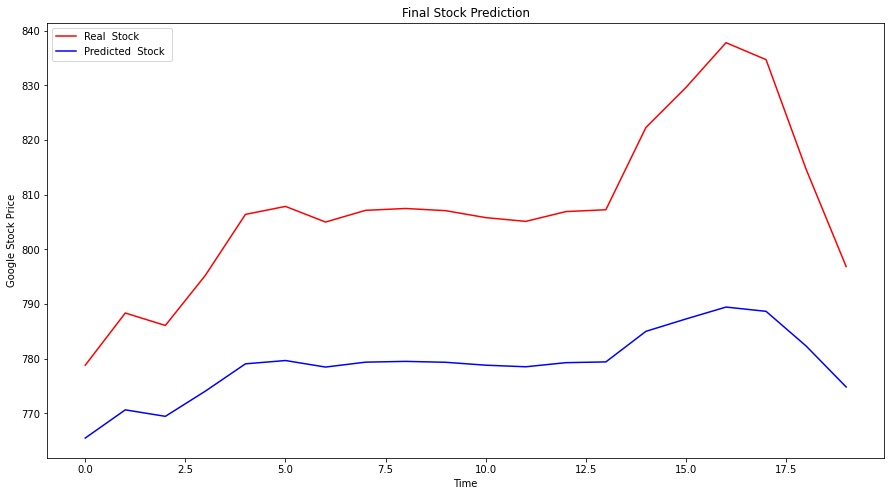

In [34]:
plt.rcParams['figure.figsize'] = (15, 8)

plt.plot(test_stock, color = 'red', label = 'Real  Stock ')
plt.plot(prediction, color = 'blue', label = 'Predicted  Stock ')
plt.title('Final Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()